<a href="https://colab.research.google.com/github/OlehVorobiov/solutions_repo/blob/main/docs/Interactives/PayloadTrajectorySimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

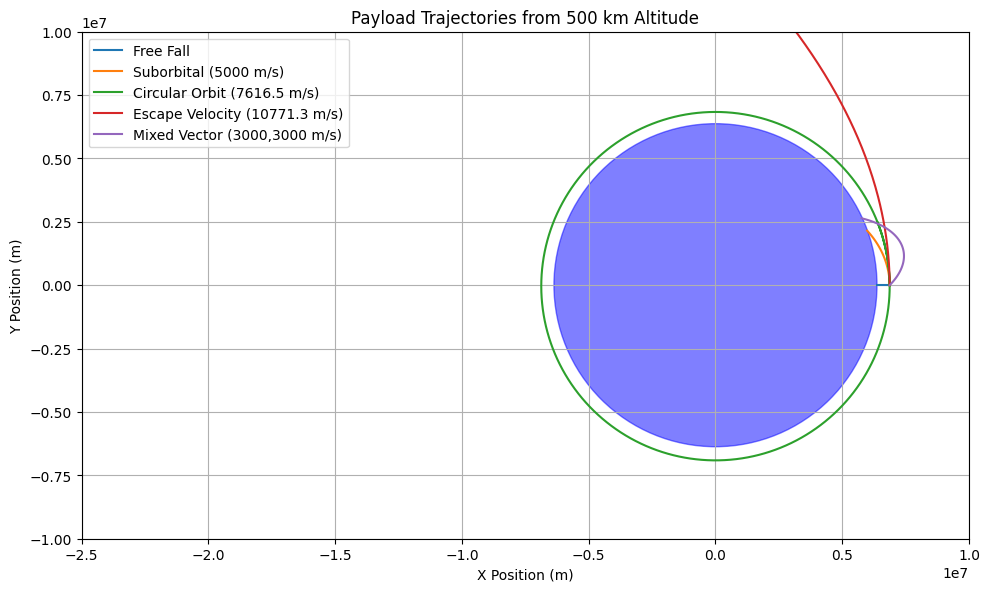

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11      # Gravitational constant (m^3/kg/s^2)
M = 5.972e24         # Mass of Earth (kg)
R_earth = 6.371e6    # Radius of Earth (m)

# Time parameters
dt = 10.0            # Time step (s)
t_max = 6000.0       # Total time of simulation (s)
steps = int(t_max / dt)

# Initial position (altitude above Earth surface)
altitude = 500e3     # 200 km above surface
r0 = R_earth + altitude

# Compute circular and escape velocities at this altitude
v_circ = np.sqrt(G * M / r0)
v_esc  = np.sqrt(2 * G * M / r0)

# Define different initial velocities (m/s) and labels
initial_conditions = [
    {'vx': 0.0, 'vy': 0.0,        'label': 'Free Fall'},
    {'vx': 0.0, 'vy': 5000.0,     'label': 'Suborbital (5000 m/s)'},
    {'vx': 0.0, 'vy': v_circ,     'label': f'Circular Orbit ({v_circ:.1f} m/s)'},
    {'vx': 0.0, 'vy': v_esc,      'label': f'Escape Velocity ({v_esc:.1f} m/s)'},
    {'vx': 3000.0, 'vy': 3000.0,  'label': 'Mixed Vector (3000,3000 m/s)'},
]

# Prepare for plot
fig, ax = plt.subplots(figsize=(10, 10))
earth = plt.Circle((0, 0), R_earth, color='blue', alpha=0.5)
ax.add_artist(earth)

# Run simulation (Euler method) for each initial condition
for ic in initial_conditions:
    x, y = r0, 0.0
    vx, vy = ic['vx'], ic['vy']
    traj_x, traj_y = [x], [y]

    for _ in range(steps):
        r = np.sqrt(x**2 + y**2)
        if r <= R_earth:
            break  # Impact

        # Gravitational acceleration components
        ax_g = -G * M * x / r**3
        ay_g = -G * M * y / r**3

        # Update velocity and position
        vx += ax_g * dt
        vy += ay_g * dt
        x  += vx * dt
        y  += vy * dt

        traj_x.append(x)
        traj_y.append(y)

    ax.plot(traj_x, traj_y, label=ic['label'])

# Plot setup
ax.set_title("Payload Trajectories from 500 km Altitude")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_aspect('equal', 'box')
ax.set_xlim(-2.5e7, 1e7)
ax.set_ylim(-1e7, 1e7)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


